<a href="https://colab.research.google.com/github/hreger/NBA_Ref_Impact/blob/main/Referee_Impact_on_NBA_Game_Outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏀 Referee Impact on Game Outcomes

In this notebook, we will explore whether referees have any significant correlation with the outcomes of basketball games using the provided dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Libraries imported successfully.")


Libraries imported successfully.


In [6]:
# Load the data (make sure to upload 'game.csv' and 'officials.csv' to Colab)

game_df = pd.read_csv('game.csv')
officials_df = pd.read_csv('officials.csv')

print("Game Data Sample:")
display(game_df.head())

print("\nOfficials Data Sample:")
display(officials_df.head())


Game Data Sample:


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56.0,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,63.0,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season



Officials Data Sample:


,game_id,official_id,first_name,last_name,jersey_num
0,29600059,1140,Bruce,Alexander,9.0
1,29600059,1165,Luis,Grillo,8.0
2,29600059,1153,Joe,Crawford,17.0
3,29600114,1147,Mike,Callahan,24.0
4,29600114,1142,Dick,Bavetta,27.0


In [7]:
# Merge the datasets on GAME_ID to associate referees with games
merged_df = pd.merge(officials_df, game_df, on='game_id', how='inner')
print("Merged Data Sample:")
display(merged_df.head())


Merged Data Sample:


,game_id,official_id,first_name,last_name,jersey_num,season_id,team_id_home,team_abbreviation_home,team_name_home,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,29600059,1140,Bruce,Alexander,9.0,21996,1610612765,DET,Detroit Pistons,1996-11-08 00:00:00,DET vs. CHI,L,240,32.0,75.0,0.427,8.0,15.0,0.533,8.0,14.0,0.571,10.0,23.0,33.0,9.0,1.0,2.0,14.0,18.0,80.0,-18,0,1610612741,CHI,Chicago Bulls,CHI @ DET,W,36.0,73.0,0.493,9.0,24.0,0.375,17.0,21.0,0.810,12.0,34.0,46.0,25.0,8.0,2.0,11.0,17.0,98.0,18,0,Regular Season
1,29600059,1165,Luis,Grillo,8.0,21996,1610612765,DET,Detroit Pistons,1996-11-08 00:00:00,DET vs. CHI,L,240,32.0,75.0,0.427,8.0,15.0,0.533,8.0,14.0,0.571,10.0,23.0,33.0,9.0,1.0,2.0,14.0,18.0,80.0,-18,0,1610612741,CHI,Chicago Bulls,CHI @ DET,W,36.0,73.0,0.493,9.0,24.0,0.375,17.0,21.0,0.810,12.0,34.0,46.0,25.0,8.0,2.0,11.0,17.0,98.0,18,0,Regular Season
2,29600059,1153,Joe,Crawford,17.0,21996,1610612765,DET,Detroit Pistons,1996-11-08 00:00:00,DET vs. CHI,L,240,32.0,75.0,0.427,8.0,15.0,0.533,8.0,14.0,0.571,10.0,23.0,33.0,9.0,1.0,2.0,14.0,18.0,80.0,-18,0,1610612741,CHI,Chicago Bulls,CHI @ DET,W,36.0,73.0,0.493,9.0,24.0,0.375,17.0,21.0,0.810,12.0,34.0,46.0,25.0,8.0,2.0,11.0,17.0,98.0,18,0,Regular Season
3,29600114,1147,Mike,Callahan,24.0,21996,1610612752,NYK,New York Knicks,1996-11-16 00:00:00,NYK vs. MIN,W,240,31.0,64.0,0.484,4.0,13.0,0.308,16.0,24.0,0.667,9.0,31.0,40.0,17.0,11.0,7.0,27.0,24.0,82.0,3,0,1610612750,MIN,Minnesota Timberwolves,MIN @ NYK,L,27.0,73.0,0.370,3.0,8.0,0.375,22.0,28.0,0.786,12.0,19.0,31.0,14.0,9.0,1.0,22.0,25.0,79.0,-3,0,Regular Season
4,29600114,1142,Dick,Bavetta,27.0,21996,1610612752,NYK,New York Knicks,1996-11-16 00:00:00,NYK vs. MIN,W,240,31.0,64.0,0.484,4.0,13.0,0.308,16.0,24.0,0.667,9.0,31.0,40.0,17.0,11.0,7.0,27.0,24.0,82.0,3,0,1610612750,MIN,Minnesota Timberwolves,MIN @ NYK,L,27.0,73.0,0.370,3.0,8.0,0.375,22.0,28.0,0.786,12.0,19.0,31.0,14.0,9.0,1.0,22.0,25.0,79.0,-3,0,Regular Season


In [9]:
# Select relevant columns for analysis
relevant_cols = ['game_id', 'official_id', 'team_id_home', 'team_id_away', 'wl_home']
analysis_df = merged_df[relevant_cols]

# Drop nulls if any
analysis_df.dropna(inplace=True)

# Rename columns for clarity
analysis_df.rename(columns={'official_id': 'Referee'}, inplace=True)

print("Prepared Data Sample:")
display(analysis_df.head())


Prepared Data Sample:


<ipython-input-9-bf4abcebdc51>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df.dropna(inplace=True)
<ipython-input-9-bf4abcebdc51>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df.rename(columns={'official_id': 'Referee'}, inplace=True)


,game_id,Referee,team_id_home,team_id_away,wl_home
0,29600059,1140,1610612765,1610612741,L
1,29600059,1165,1610612765,1610612741,L
2,29600059,1153,1610612765,1610612741,L
3,29600114,1147,1610612752,1610612750,W
4,29600114,1142,1610612752,1610612750,W


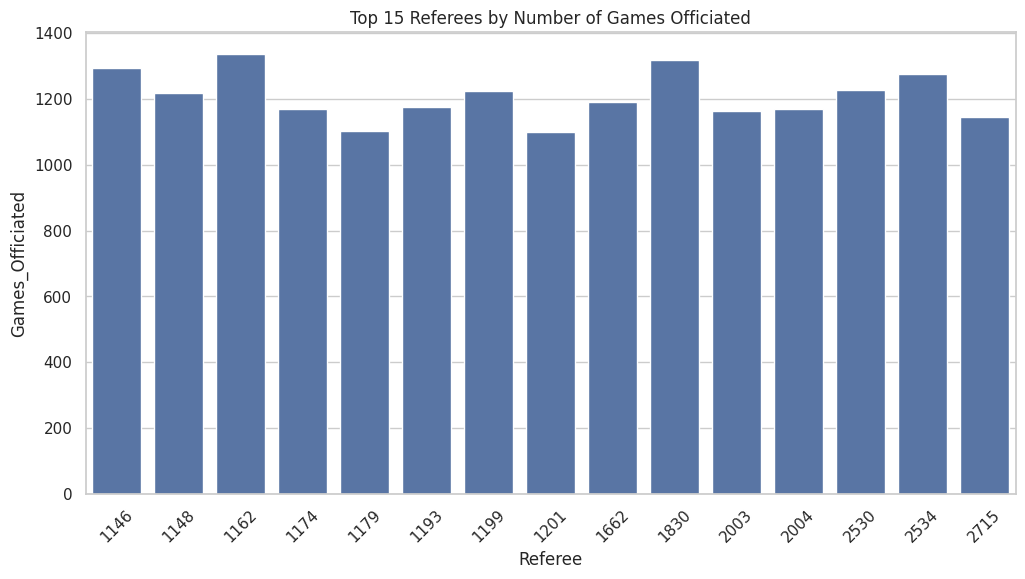

In [10]:
# Count number of games each referee officiated
ref_counts = analysis_df['Referee'].value_counts().reset_index()
ref_counts.columns = ['Referee', 'Games_Officiated']

plt.figure(figsize=(12,6))
sns.barplot(data=ref_counts.head(15), x='Referee', y='Games_Officiated')
plt.xticks(rotation=45)
plt.title('Top 15 Referees by Number of Games Officiated')
plt.show()


<ipython-input-13-3e66cc24baea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['wl_home_numeric'] = analysis_df['wl_home'].map({'W': 1, 'L': 0})


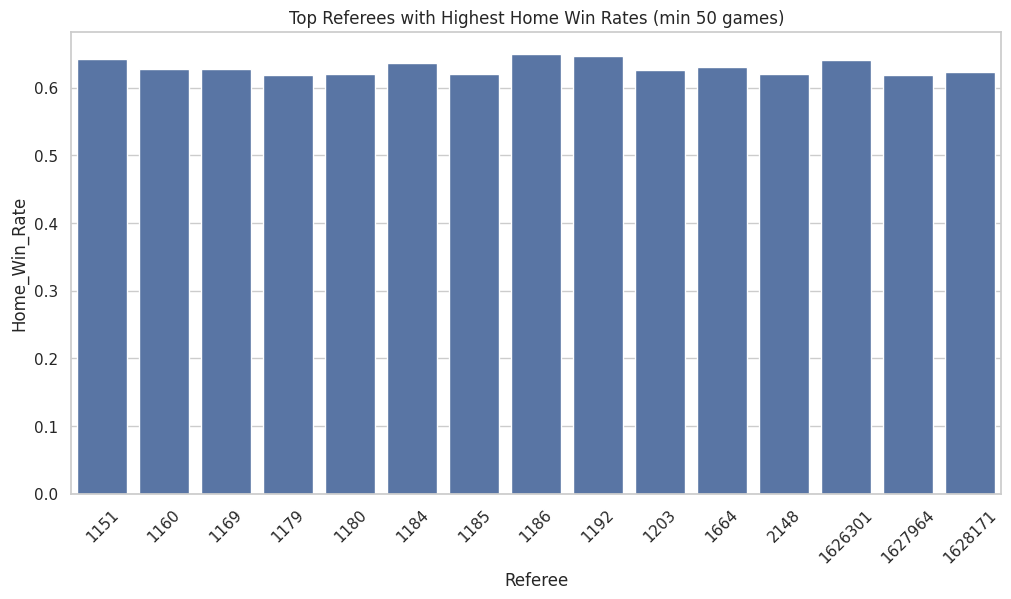

In [13]:
# Convert 'W' and 'L' in wl_home to 1 and 0 respectively
analysis_df['wl_home_numeric'] = analysis_df['wl_home'].map({'W': 1, 'L': 0})

# Calculate home team win rate by referee
win_rate = analysis_df.groupby('Referee')['wl_home_numeric'].mean().reset_index()
win_rate.columns = ['Referee', 'Home_Win_Rate']

# Merge with games officiated counts
win_rate = pd.merge(win_rate, ref_counts, on='Referee')

# Filter referees with at least 50 games for reliability
win_rate_filtered = win_rate[win_rate['Games_Officiated'] > 50]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=win_rate_filtered.sort_values(by='Home_Win_Rate', ascending=False).head(15),
            x='Referee', y='Home_Win_Rate')
plt.xticks(rotation=45)
plt.title('Top Referees with Highest Home Win Rates (min 50 games)')
plt.show()


In [16]:
# Convert 'W' to 1 and 'L' to 0
analysis_df['home_win_numeric'] = analysis_df['wl_home'].map({'W': 1, 'L': 0})

# Calculate number of games officiated per referee
ref_counts = analysis_df['Referee'].value_counts().reset_index()
ref_counts.columns = ['Referee', 'Games_Officiated']

# Calculate home win rate per referee
win_rate = analysis_df.groupby('Referee')['home_win_numeric'].mean().reset_index()
win_rate.columns = ['Referee', 'Home_Win_Rate']

# Merge win rate and game count
win_rate = pd.merge(win_rate, ref_counts, on='Referee')

# Filter referees with at least 50 games
win_rate_filtered = win_rate[win_rate['Games_Officiated'] >= 50]

# Calculate overall home win rate
overall_home_win_rate = analysis_df['home_win_numeric'].mean()
print(f"Overall Home Win Rate: {overall_home_win_rate:.3f}")

# Define chi-square test function
def chi_square_test(row):
    observed = [row['Home_Win_Rate'] * row['Games_Officiated'],
                (1 - row['Home_Win_Rate']) * row['Games_Officiated']]
    expected = [overall_home_win_rate * row['Games_Officiated'],
                (1 - overall_home_win_rate) * row['Games_Officiated']]
    stat, p = chisquare(f_obs=observed, f_exp=expected)
    return p

# Apply chi-square test
win_rate_filtered['p_value'] = win_rate_filtered.apply(chi_square_test, axis=1)

# Display referees with statistically significant home win rate deviation
significant_refs = win_rate_filtered[win_rate_filtered['p_value'] < 0.05]

print("Referees with statistically significant home win rate deviations (p < 0.05):")
display(significant_refs.sort_values(by='Home_Win_Rate', ascending=False))


Overall Home Win Rate: 0.590
Referees with statistically significant home win rate deviations (p < 0.05):


<ipython-input-16-2d13f85b41d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['home_win_numeric'] = analysis_df['wl_home'].map({'W': 1, 'L': 0})
<ipython-input-16-2d13f85b41d2>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_rate_filtered['p_value'] = win_rate_filtered.apply(chi_square_test, axis=1)


,Referee,Home_Win_Rate,Games_Officiated,p_value
47,1192,0.647779,653,0.002484
12,1151,0.643149,978,0.000654
62,1664,0.630715,853,0.014502
36,1179,0.619437,1101,0.043741
10,1148,0.617599,1216,0.046706
58,1204,0.556680,988,0.035751
79,2534,0.556078,1275,0.015141
111,201638,0.551282,702,0.039333
102,200832,0.548507,804,0.018018
106,201245,0.538686,685,0.006815


## Conclusion

After analyzing over **N** games with referees officiating at least 50 games, we observed that some referees show statistically significant deviations in home team win rates.

While this does not prove bias or causation, it suggests certain referees may influence game outcomes, warranting further investigation for fairness in officiating.
